In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_120_5degree.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape((25*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(120_5deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape((25*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.3,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(105, 100, 100)


In [17]:
print(y_test.shape)

(45, 100, 100)


In [18]:
print(x_train.shape)

(105, 15, 1)


In [19]:
print(x_test.shape)

(45, 15, 1)


In [20]:
theta_train.shape

(105,)

In [21]:
tsr_train.shape

(105,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayerSensor')(x_)
output_image = tf.keras.layers.Reshape((100,100))(output_data)
# MLP
sd = tf.keras.Model(input_time, output_image)

In [24]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [25]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
           loss = tf.keras.losses.MeanSquaredError(),
           metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((105, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((45, 2, 1))

In [28]:
tsr_theta_train.shape

(105, 2, 1)

In [29]:
start = datetime.datetime.now()
history = sd.fit(tsr_theta_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
3/3 [==============================] - 1s 7ms/step - loss: 0.0113 - rmse: 0.1055
Epoch 2/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0112 - rmse: 0.1051
Epoch 3/10000
3/3 [==============================] - 0s 7ms/step - loss: 0.0111 - rmse: 0.1047
Epoch 4/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0110 - rmse: 0.1043
Epoch 5/10000
3/3 [==============================] - 0s 7ms/step - loss: 0.0109 - rmse: 0.1038
Epoch 6/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0108 - rmse: 0.1032
Epoch 7/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.1024
Epoch 8/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0104 - rmse: 0.1013
Epoch 9/10000
3/3 [==============================] - 0s 7ms/step - loss: 0.0101 - rmse: 0.0999
Epoch 10/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0098 - rmse: 0.0982
Epoch 11/10000
3/3 [=============================

3/3 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0834
Epoch 87/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0834
Epoch 88/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0834
Epoch 89/10000
3/3 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0834
Epoch 90/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0834
Epoch 91/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0834
Epoch 92/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0834
Epoch 93/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0834
Epoch 94/10000
3/3 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0834
Epoch 95/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0834
Epoch 96/10000
3/3 [==============================] - 0

3/3 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0817
Epoch 171/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0817
Epoch 172/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0817
Epoch 173/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0816
Epoch 174/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0816
Epoch 175/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0816
Epoch 176/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0816
Epoch 177/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0815
Epoch 178/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0815
Epoch 179/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0815
Epoch 180/10000
3/3 [=========================

3/3 [==============================] - 0s 6ms/step - loss: 0.0066 - rmse: 0.0801
Epoch 255/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0066 - rmse: 0.0801
Epoch 256/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0065 - rmse: 0.0801
Epoch 257/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0065 - rmse: 0.0800
Epoch 258/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0065 - rmse: 0.0800
Epoch 259/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0800
Epoch 260/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0065 - rmse: 0.0799
Epoch 261/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0799
Epoch 262/10000
3/3 [==============================] - 0s 7ms/step - loss: 0.0065 - rmse: 0.0799
Epoch 263/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0065 - rmse: 0.0799
Epoch 264/10000
3/3 [=========================

3/3 [==============================] - 0s 6ms/step - loss: 0.0060 - rmse: 0.0767
Epoch 339/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0060 - rmse: 0.0766
Epoch 340/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0060 - rmse: 0.0767
Epoch 341/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0765
Epoch 342/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0764
Epoch 343/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0060 - rmse: 0.0763
Epoch 344/10000
3/3 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0763
Epoch 345/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0059 - rmse: 0.0761
Epoch 346/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0059 - rmse: 0.0760
Epoch 347/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0059 - rmse: 0.0759
Epoch 348/10000
3/3 [=========================

3/3 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0712
Epoch 423/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0712
Epoch 424/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0711
Epoch 425/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0710
Epoch 426/10000
3/3 [==============================] - 0s 7ms/step - loss: 0.0052 - rmse: 0.0710
Epoch 427/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0709
Epoch 428/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0709
Epoch 429/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0708
Epoch 430/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0707
Epoch 431/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0707
Epoch 432/10000
3/3 [=========================

3/3 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0655
Epoch 507/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0654
Epoch 508/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0652
Epoch 509/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0651
Epoch 510/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0650
Epoch 511/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0650
Epoch 512/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0649
Epoch 513/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0648
Epoch 514/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0647
Epoch 515/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0645
Epoch 516/10000
3/3 [=========================

3/3 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0562
Epoch 591/10000
3/3 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0560
Epoch 592/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0561
Epoch 593/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0558
Epoch 594/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0556
Epoch 595/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0556
Epoch 596/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0554
Epoch 597/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0557
Epoch 598/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0556
Epoch 599/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0559
Epoch 600/10000
3/3 [=========================

3/3 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0461
Epoch 675/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0460
Epoch 676/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0458
Epoch 677/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0459
Epoch 678/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0456
Epoch 679/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0456
Epoch 680/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0455
Epoch 681/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0453
Epoch 682/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0451
Epoch 683/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0450
Epoch 684/10000
3/3 [=========================

3/3 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0381
Epoch 759/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0380
Epoch 760/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0382
Epoch 761/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0380
Epoch 762/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0379
Epoch 763/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0381
Epoch 764/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0379
Epoch 765/10000
3/3 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0376
Epoch 766/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0377
Epoch 767/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0375
Epoch 768/10000
3/3 [=========================

3/3 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0329
Epoch 843/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0329
Epoch 844/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0328
Epoch 845/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0328
Epoch 846/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0328
Epoch 847/10000
3/3 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0327
Epoch 848/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0326
Epoch 849/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0327
Epoch 850/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0326
Epoch 851/10000
3/3 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0325
Epoch 852/10000
3/3 [=========================

3/3 [==============================] - 0s 6ms/step - loss: 9.5944e-04 - rmse: 0.0292
Epoch 926/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.5974e-04 - rmse: 0.0292
Epoch 927/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.5929e-04 - rmse: 0.0292
Epoch 928/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.5376e-04 - rmse: 0.0291
Epoch 929/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.5125e-04 - rmse: 0.0290
Epoch 930/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.5118e-04 - rmse: 0.0290
Epoch 931/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.4530e-04 - rmse: 0.0289
Epoch 932/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.4395e-04 - rmse: 0.0289
Epoch 933/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.4352e-04 - rmse: 0.0289
Epoch 934/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.4824e-04 - rmse: 0.0290
Epoch 

3/3 [==============================] - 0s 6ms/step - loss: 7.7037e-04 - rmse: 0.0258
Epoch 1007/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.6729e-04 - rmse: 0.0257
Epoch 1008/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.6624e-04 - rmse: 0.0257
Epoch 1009/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.6505e-04 - rmse: 0.0257
Epoch 1010/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.6107e-04 - rmse: 0.0256
Epoch 1011/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.6039e-04 - rmse: 0.0256
Epoch 1012/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.5721e-04 - rmse: 0.0255
Epoch 1013/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.5509e-04 - rmse: 0.0255
Epoch 1014/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.5366e-04 - rmse: 0.0255
Epoch 1015/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.4955e-04 - rmse: 0.02

3/3 [==============================] - 0s 6ms/step - loss: 6.1563e-04 - rmse: 0.0227
Epoch 1087/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.1235e-04 - rmse: 0.0226
Epoch 1088/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.1185e-04 - rmse: 0.0226
Epoch 1089/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.0676e-04 - rmse: 0.0225
Epoch 1090/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.0508e-04 - rmse: 0.0224
Epoch 1091/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.0325e-04 - rmse: 0.0224
Epoch 1092/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.0207e-04 - rmse: 0.0224
Epoch 1093/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.9974e-04 - rmse: 0.0223
Epoch 1094/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.9841e-04 - rmse: 0.0223
Epoch 1095/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.9545e-04 - rmse: 0.02

3/3 [==============================] - 0s 6ms/step - loss: 4.8340e-04 - rmse: 0.0196
Epoch 1167/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.8169e-04 - rmse: 0.0195
Epoch 1168/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.8270e-04 - rmse: 0.0196
Epoch 1169/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8232e-04 - rmse: 0.0196
Epoch 1170/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7935e-04 - rmse: 0.0195
Epoch 1171/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8165e-04 - rmse: 0.0195
Epoch 1172/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7711e-04 - rmse: 0.0194
Epoch 1173/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7531e-04 - rmse: 0.0194
Epoch 1174/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.7492e-04 - rmse: 0.0194
Epoch 1175/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.7289e-04 - rmse: 0.01

3/3 [==============================] - 0s 5ms/step - loss: 3.8863e-04 - rmse: 0.0171
Epoch 1247/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.8488e-04 - rmse: 0.0169
Epoch 1248/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.8662e-04 - rmse: 0.0170
Epoch 1249/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.8438e-04 - rmse: 0.0169
Epoch 1250/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.8252e-04 - rmse: 0.0169
Epoch 1251/10000
3/3 [==============================] - 0s 7ms/step - loss: 3.8277e-04 - rmse: 0.0169
Epoch 1252/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.8093e-04 - rmse: 0.0168
Epoch 1253/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.7875e-04 - rmse: 0.0168
Epoch 1254/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.7796e-04 - rmse: 0.0167
Epoch 1255/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.7820e-04 - rmse: 0.01

3/3 [==============================] - 0s 6ms/step - loss: 3.1826e-04 - rmse: 0.0149
Epoch 1327/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.1602e-04 - rmse: 0.0148
Epoch 1328/10000
3/3 [==============================] - 0s 5ms/step - loss: 3.1342e-04 - rmse: 0.0148
Epoch 1329/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.1341e-04 - rmse: 0.0148
Epoch 1330/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.1302e-04 - rmse: 0.0147
Epoch 1331/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.1291e-04 - rmse: 0.0147
Epoch 1332/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.1174e-04 - rmse: 0.0147
Epoch 1333/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.1161e-04 - rmse: 0.0147
Epoch 1334/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.1012e-04 - rmse: 0.0146
Epoch 1335/10000
3/3 [==============================] - 0s 6ms/step - loss: 3.1134e-04 - rmse: 0.01

3/3 [==============================] - 0s 6ms/step - loss: 2.6680e-04 - rmse: 0.0132
Epoch 1407/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.6609e-04 - rmse: 0.0131
Epoch 1408/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.6572e-04 - rmse: 0.0131
Epoch 1409/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.6486e-04 - rmse: 0.0131
Epoch 1410/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.6425e-04 - rmse: 0.0131
Epoch 1411/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.6437e-04 - rmse: 0.0131
Epoch 1412/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.6304e-04 - rmse: 0.0130
Epoch 1413/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.6526e-04 - rmse: 0.0131
Epoch 1414/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.6330e-04 - rmse: 0.0130
Epoch 1415/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.6231e-04 - rmse: 0.01

3/3 [==============================] - 0s 6ms/step - loss: 2.2991e-04 - rmse: 0.0118
Epoch 1487/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.3066e-04 - rmse: 0.0118
Epoch 1488/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2878e-04 - rmse: 0.0117
Epoch 1489/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2945e-04 - rmse: 0.0117
Epoch 1490/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.2966e-04 - rmse: 0.0118
Epoch 1491/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.2755e-04 - rmse: 0.0117
Epoch 1492/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.2729e-04 - rmse: 0.0117
Epoch 1493/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2754e-04 - rmse: 0.0117
Epoch 1494/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2698e-04 - rmse: 0.0116
Epoch 1495/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.2700e-04 - rmse: 0.01

3/3 [==============================] - 0s 6ms/step - loss: 2.0204e-04 - rmse: 0.0106
Epoch 1567/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0178e-04 - rmse: 0.0106
Epoch 1568/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0123e-04 - rmse: 0.0106
Epoch 1569/10000
3/3 [==============================] - 0s 7ms/step - loss: 2.0060e-04 - rmse: 0.0105
Epoch 1570/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0075e-04 - rmse: 0.0105
Epoch 1571/10000
3/3 [==============================] - 0s 5ms/step - loss: 2.0277e-04 - rmse: 0.0106
Epoch 1572/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0203e-04 - rmse: 0.0106
Epoch 1573/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0273e-04 - rmse: 0.0106
Epoch 1574/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0445e-04 - rmse: 0.0107
Epoch 1575/10000
3/3 [==============================] - 0s 6ms/step - loss: 2.0406e-04 - rmse: 0.01

3/3 [==============================] - 0s 5ms/step - loss: 1.8320e-04 - rmse: 0.0098
Epoch 1647/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8321e-04 - rmse: 0.0098
Epoch 1648/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.8276e-04 - rmse: 0.0097
Epoch 1649/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8110e-04 - rmse: 0.0097
Epoch 1650/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8124e-04 - rmse: 0.0097
Epoch 1651/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8108e-04 - rmse: 0.0097
Epoch 1652/10000
3/3 [==============================] - 0s 7ms/step - loss: 1.8025e-04 - rmse: 0.0096
Epoch 1653/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.8070e-04 - rmse: 0.0096
Epoch 1654/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7989e-04 - rmse: 0.0096
Epoch 1655/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.7988e-04 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.6811e-04 - rmse: 0.0091
Epoch 1727/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6950e-04 - rmse: 0.0091
Epoch 1728/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6929e-04 - rmse: 0.0091
Epoch 1729/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6740e-04 - rmse: 0.0090
Epoch 1730/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6888e-04 - rmse: 0.0091
Epoch 1731/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6992e-04 - rmse: 0.0092
Epoch 1732/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6935e-04 - rmse: 0.0091
Epoch 1733/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.6751e-04 - rmse: 0.0090
Epoch 1734/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6697e-04 - rmse: 0.0090
Epoch 1735/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6622e-04 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.5625e-04 - rmse: 0.0085
Epoch 1807/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.5984e-04 - rmse: 0.0087
Epoch 1808/10000
3/3 [==============================] - 0s 7ms/step - loss: 1.6346e-04 - rmse: 0.0089
Epoch 1809/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6765e-04 - rmse: 0.0091
Epoch 1810/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6311e-04 - rmse: 0.0089
Epoch 1811/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.5926e-04 - rmse: 0.0087
Epoch 1812/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6016e-04 - rmse: 0.0087
Epoch 1813/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.6098e-04 - rmse: 0.0088
Epoch 1814/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.5664e-04 - rmse: 0.0085
Epoch 1815/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.5638e-04 - rmse: 0.00

3/3 [==============================] - 0s 7ms/step - loss: 1.4340e-04 - rmse: 0.0078
Epoch 1887/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.4348e-04 - rmse: 0.0078
Epoch 1888/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.4321e-04 - rmse: 0.0078
Epoch 1889/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.4300e-04 - rmse: 0.0078
Epoch 1890/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.4315e-04 - rmse: 0.0078
Epoch 1891/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.4255e-04 - rmse: 0.0077
Epoch 1892/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.4262e-04 - rmse: 0.0078
Epoch 1893/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.4287e-04 - rmse: 0.0078
Epoch 1894/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.4251e-04 - rmse: 0.0078
Epoch 1895/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.4251e-04 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.3519e-04 - rmse: 0.0074
Epoch 1967/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.3499e-04 - rmse: 0.0073
Epoch 1968/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.3489e-04 - rmse: 0.0073
Epoch 1969/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.3487e-04 - rmse: 0.0073
Epoch 1970/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.3496e-04 - rmse: 0.0073
Epoch 1971/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.3489e-04 - rmse: 0.0073
Epoch 1972/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.3505e-04 - rmse: 0.0074
Epoch 1973/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.3589e-04 - rmse: 0.0074
Epoch 1974/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.3505e-04 - rmse: 0.0074
Epoch 1975/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.3471e-04 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.2844e-04 - rmse: 0.0070
Epoch 2047/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.2795e-04 - rmse: 0.0070
Epoch 2048/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.2805e-04 - rmse: 0.0070
Epoch 2049/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.2774e-04 - rmse: 0.0069
Epoch 2050/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.2777e-04 - rmse: 0.0070
Epoch 2051/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.2805e-04 - rmse: 0.0070
Epoch 2052/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.2778e-04 - rmse: 0.0070
Epoch 2053/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.2856e-04 - rmse: 0.0070
Epoch 2054/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.2879e-04 - rmse: 0.0070
Epoch 2055/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.2914e-04 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.2238e-04 - rmse: 0.0066
Epoch 2127/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.2208e-04 - rmse: 0.0066
Epoch 2128/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.2251e-04 - rmse: 0.0067
Epoch 2129/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2232e-04 - rmse: 0.0066
Epoch 2130/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2295e-04 - rmse: 0.0067
Epoch 2131/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.2216e-04 - rmse: 0.0066
Epoch 2132/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.2176e-04 - rmse: 0.0066
Epoch 2133/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.2193e-04 - rmse: 0.0066
Epoch 2134/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.2166e-04 - rmse: 0.0066
Epoch 2135/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.2135e-04 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.1718e-04 - rmse: 0.0063
Epoch 2207/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1689e-04 - rmse: 0.0063
Epoch 2208/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1739e-04 - rmse: 0.0064
Epoch 2209/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1721e-04 - rmse: 0.0064
Epoch 2210/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1713e-04 - rmse: 0.0064
Epoch 2211/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1732e-04 - rmse: 0.0064
Epoch 2212/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1756e-04 - rmse: 0.0064
Epoch 2213/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1712e-04 - rmse: 0.0064
Epoch 2214/10000
3/3 [==============================] - 0s 7ms/step - loss: 1.1697e-04 - rmse: 0.0063
Epoch 2215/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1655e-04 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 1.1304e-04 - rmse: 0.0061
Epoch 2287/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1293e-04 - rmse: 0.0061
Epoch 2288/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1260e-04 - rmse: 0.0061
Epoch 2289/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1319e-04 - rmse: 0.0061
Epoch 2290/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1330e-04 - rmse: 0.0061
Epoch 2291/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1295e-04 - rmse: 0.0061
Epoch 2292/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1264e-04 - rmse: 0.0061
Epoch 2293/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.1312e-04 - rmse: 0.0061
Epoch 2294/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.1278e-04 - rmse: 0.0061
Epoch 2295/10000
3/3 [==============================] - 0s 7ms/step - loss: 1.1274e-04 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.0897e-04 - rmse: 0.0059
Epoch 2367/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0898e-04 - rmse: 0.0059
Epoch 2368/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.0911e-04 - rmse: 0.0059
Epoch 2369/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.0922e-04 - rmse: 0.0059
Epoch 2370/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0877e-04 - rmse: 0.0059
Epoch 2371/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0953e-04 - rmse: 0.0059
Epoch 2372/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0899e-04 - rmse: 0.0059
Epoch 2373/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0850e-04 - rmse: 0.0058
Epoch 2374/10000
3/3 [==============================] - 0s 7ms/step - loss: 1.0872e-04 - rmse: 0.0059
Epoch 2375/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.0836e-04 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.0680e-04 - rmse: 0.0058
Epoch 2447/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0669e-04 - rmse: 0.0058
Epoch 2448/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0711e-04 - rmse: 0.0058
Epoch 2449/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0720e-04 - rmse: 0.0058
Epoch 2450/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0611e-04 - rmse: 0.0057
Epoch 2451/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0608e-04 - rmse: 0.0057
Epoch 2452/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0587e-04 - rmse: 0.0057
Epoch 2453/10000
3/3 [==============================] - 0s 7ms/step - loss: 1.0553e-04 - rmse: 0.0057
Epoch 2454/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0551e-04 - rmse: 0.0057
Epoch 2455/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0517e-04 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 1.0182e-04 - rmse: 0.0054
Epoch 2527/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0255e-04 - rmse: 0.0055
Epoch 2528/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0193e-04 - rmse: 0.0054
Epoch 2529/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0233e-04 - rmse: 0.0055
Epoch 2530/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0232e-04 - rmse: 0.0055
Epoch 2531/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0249e-04 - rmse: 0.0055
Epoch 2532/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0231e-04 - rmse: 0.0055
Epoch 2533/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.0191e-04 - rmse: 0.0054
Epoch 2534/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0200e-04 - rmse: 0.0055
Epoch 2535/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0134e-04 - rmse: 0.00

3/3 [==============================] - 0s 7ms/step - loss: 9.9971e-05 - rmse: 0.0054
Epoch 2607/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.0043e-04 - rmse: 0.0054
Epoch 2608/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0685e-04 - rmse: 0.0060
Epoch 2609/10000
3/3 [==============================] - 0s 7ms/step - loss: 1.0314e-04 - rmse: 0.0056
Epoch 2610/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0193e-04 - rmse: 0.0055
Epoch 2611/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0197e-04 - rmse: 0.0055
Epoch 2612/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0131e-04 - rmse: 0.0055
Epoch 2613/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0141e-04 - rmse: 0.0055
Epoch 2614/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0014e-04 - rmse: 0.0054
Epoch 2615/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0060e-04 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 9.8619e-05 - rmse: 0.0053
Epoch 2687/10000
3/3 [==============================] - 0s 7ms/step - loss: 9.8306e-05 - rmse: 0.0053
Epoch 2688/10000
3/3 [==============================] - 0s 7ms/step - loss: 9.7701e-05 - rmse: 0.0052
Epoch 2689/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.7010e-05 - rmse: 0.0052
Epoch 2690/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.7198e-05 - rmse: 0.0052
Epoch 2691/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.7385e-05 - rmse: 0.0052
Epoch 2692/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.8452e-05 - rmse: 0.0053
Epoch 2693/10000
3/3 [==============================] - 0s 7ms/step - loss: 9.9150e-05 - rmse: 0.0054
Epoch 2694/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.8032e-05 - rmse: 0.0053
Epoch 2695/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.7066e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 9.4850e-05 - rmse: 0.0050
Epoch 2767/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.4746e-05 - rmse: 0.0050
Epoch 2768/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.4003e-05 - rmse: 0.0050
Epoch 2769/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.3945e-05 - rmse: 0.0050
Epoch 2770/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.4164e-05 - rmse: 0.0050
Epoch 2771/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.3943e-05 - rmse: 0.0050
Epoch 2772/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.3703e-05 - rmse: 0.0049
Epoch 2773/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.3649e-05 - rmse: 0.0049
Epoch 2774/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.4245e-05 - rmse: 0.0050
Epoch 2775/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.3986e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 9.1947e-05 - rmse: 0.0048
Epoch 2847/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.1836e-05 - rmse: 0.0048
Epoch 2848/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.1403e-05 - rmse: 0.0048
Epoch 2849/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.1224e-05 - rmse: 0.0048
Epoch 2850/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.1671e-05 - rmse: 0.0048
Epoch 2851/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.3144e-05 - rmse: 0.0050
Epoch 2852/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.3104e-05 - rmse: 0.0050
Epoch 2853/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.2366e-05 - rmse: 0.0049
Epoch 2854/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.2764e-05 - rmse: 0.0049
Epoch 2855/10000
3/3 [==============================] - 0s 7ms/step - loss: 9.2873e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 8.8698e-05 - rmse: 0.0046
Epoch 2927/10000
3/3 [==============================] - 0s 7ms/step - loss: 8.8884e-05 - rmse: 0.0046
Epoch 2928/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.8805e-05 - rmse: 0.0046
Epoch 2929/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.8714e-05 - rmse: 0.0046
Epoch 2930/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.8603e-05 - rmse: 0.0046
Epoch 2931/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.8468e-05 - rmse: 0.0046
Epoch 2932/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.8660e-05 - rmse: 0.0046
Epoch 2933/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.8919e-05 - rmse: 0.0046
Epoch 2934/10000
3/3 [==============================] - 0s 7ms/step - loss: 8.9142e-05 - rmse: 0.0046
Epoch 2935/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.8640e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 8.7967e-05 - rmse: 0.0046
Epoch 3007/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.7118e-05 - rmse: 0.0045
Epoch 3008/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.7410e-05 - rmse: 0.0045
Epoch 3009/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.7188e-05 - rmse: 0.0045
Epoch 3010/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.6872e-05 - rmse: 0.0045
Epoch 3011/10000
3/3 [==============================] - 0s 7ms/step - loss: 8.6741e-05 - rmse: 0.0044
Epoch 3012/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.6496e-05 - rmse: 0.0044
Epoch 3013/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.6906e-05 - rmse: 0.0045
Epoch 3014/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.6604e-05 - rmse: 0.0044
Epoch 3015/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.6602e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 9.3481e-05 - rmse: 0.0052
Epoch 3087/10000
3/3 [==============================] - 0s 5ms/step - loss: 1.0090e-04 - rmse: 0.0059
Epoch 3088/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.9319e-05 - rmse: 0.0057
Epoch 3089/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0407e-04 - rmse: 0.0061
Epoch 3090/10000
3/3 [==============================] - 0s 7ms/step - loss: 9.7197e-05 - rmse: 0.0056
Epoch 3091/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0334e-04 - rmse: 0.0061
Epoch 3092/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.3261e-05 - rmse: 0.0052
Epoch 3093/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.8853e-05 - rmse: 0.0057
Epoch 3094/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.3976e-05 - rmse: 0.0053
Epoch 3095/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.1293e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 8.6233e-05 - rmse: 0.0045
Epoch 3167/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.5923e-05 - rmse: 0.0045
Epoch 3168/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.7263e-05 - rmse: 0.0047
Epoch 3169/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.9342e-05 - rmse: 0.0049
Epoch 3170/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.9985e-05 - rmse: 0.0049
Epoch 3171/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.1867e-05 - rmse: 0.0051
Epoch 3172/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.7034e-05 - rmse: 0.0056
Epoch 3173/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0338e-04 - rmse: 0.0062
Epoch 3174/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0856e-04 - rmse: 0.0066
Epoch 3175/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0651e-04 - rmse: 0.00

3/3 [==============================] - 0s 7ms/step - loss: 1.2003e-04 - rmse: 0.0074
Epoch 3247/10000
3/3 [==============================] - 0s 7ms/step - loss: 1.0576e-04 - rmse: 0.0064
Epoch 3248/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0396e-04 - rmse: 0.0062
Epoch 3249/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0169e-04 - rmse: 0.0061
Epoch 3250/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.4968e-05 - rmse: 0.0055
Epoch 3251/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.8964e-05 - rmse: 0.0058
Epoch 3252/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.6921e-05 - rmse: 0.0057
Epoch 3253/10000
3/3 [==============================] - 0s 7ms/step - loss: 9.4820e-05 - rmse: 0.0055
Epoch 3254/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.0579e-05 - rmse: 0.0051
Epoch 3255/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.6430e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 7.9592e-05 - rmse: 0.0039
Epoch 3327/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.9621e-05 - rmse: 0.0039
Epoch 3328/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.9611e-05 - rmse: 0.0039
Epoch 3329/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.9688e-05 - rmse: 0.0039
Epoch 3330/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.9862e-05 - rmse: 0.0039
Epoch 3331/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.0055e-05 - rmse: 0.0040
Epoch 3332/10000
3/3 [==============================] - 0s 7ms/step - loss: 8.0215e-05 - rmse: 0.0040
Epoch 3333/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.0305e-05 - rmse: 0.0040
Epoch 3334/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.9948e-05 - rmse: 0.0040
Epoch 3335/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.9871e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 7.9054e-05 - rmse: 0.0039
Epoch 3407/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.9648e-05 - rmse: 0.0040
Epoch 3408/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.0378e-05 - rmse: 0.0041
Epoch 3409/10000
3/3 [==============================] - 0s 7ms/step - loss: 8.3074e-05 - rmse: 0.0044
Epoch 3410/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.6115e-05 - rmse: 0.0047
Epoch 3411/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.5133e-05 - rmse: 0.0046
Epoch 3412/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.4701e-05 - rmse: 0.0056
Epoch 3413/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.4114e-05 - rmse: 0.0055
Epoch 3414/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.6858e-05 - rmse: 0.0048
Epoch 3415/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.4665e-05 - rmse: 0.00

3/3 [==============================] - 0s 7ms/step - loss: 7.7922e-05 - rmse: 0.0038
Epoch 3487/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.8079e-05 - rmse: 0.0039
Epoch 3488/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.7811e-05 - rmse: 0.0038
Epoch 3489/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.7955e-05 - rmse: 0.0038
Epoch 3490/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.8568e-05 - rmse: 0.0039
Epoch 3491/10000
3/3 [==============================] - 0s 7ms/step - loss: 7.9602e-05 - rmse: 0.0041
Epoch 3492/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.9366e-05 - rmse: 0.0040
Epoch 3493/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.0082e-05 - rmse: 0.0041
Epoch 3494/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.0652e-05 - rmse: 0.0042
Epoch 3495/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.0274e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 7.5960e-05 - rmse: 0.0037
Epoch 3567/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.5970e-05 - rmse: 0.0037
Epoch 3568/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.5854e-05 - rmse: 0.0036
Epoch 3569/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.5901e-05 - rmse: 0.0036
Epoch 3570/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.5877e-05 - rmse: 0.0036
Epoch 3571/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.5648e-05 - rmse: 0.0036
Epoch 3572/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.5553e-05 - rmse: 0.0036
Epoch 3573/10000
3/3 [==============================] - 0s 7ms/step - loss: 7.5833e-05 - rmse: 0.0036
Epoch 3574/10000
3/3 [==============================] - 0s 7ms/step - loss: 7.6208e-05 - rmse: 0.0037
Epoch 3575/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.6444e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 7.7858e-05 - rmse: 0.0040
Epoch 3647/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.6537e-05 - rmse: 0.0038
Epoch 3648/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.9142e-05 - rmse: 0.0041
Epoch 3649/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.4340e-05 - rmse: 0.0047
Epoch 3650/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.0151e-05 - rmse: 0.0053
Epoch 3651/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.9015e-05 - rmse: 0.0052
Epoch 3652/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.1040e-05 - rmse: 0.0054
Epoch 3653/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.3988e-05 - rmse: 0.0047
Epoch 3654/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.2868e-05 - rmse: 0.0046
Epoch 3655/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.4864e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 7.3306e-05 - rmse: 0.0034
Epoch 3727/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.3368e-05 - rmse: 0.0034
Epoch 3728/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.3366e-05 - rmse: 0.0034
Epoch 3729/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.3436e-05 - rmse: 0.0034
Epoch 3730/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.3494e-05 - rmse: 0.0034
Epoch 3731/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.3342e-05 - rmse: 0.0034
Epoch 3732/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.3492e-05 - rmse: 0.0035
Epoch 3733/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.3279e-05 - rmse: 0.0034
Epoch 3734/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.3346e-05 - rmse: 0.0034
Epoch 3735/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.3407e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 7.2452e-05 - rmse: 0.0034
Epoch 3807/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.2650e-05 - rmse: 0.0034
Epoch 3808/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.2758e-05 - rmse: 0.0034
Epoch 3809/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.2772e-05 - rmse: 0.0034
Epoch 3810/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.2549e-05 - rmse: 0.0034
Epoch 3811/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.2968e-05 - rmse: 0.0034
Epoch 3812/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.2932e-05 - rmse: 0.0034
Epoch 3813/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.2435e-05 - rmse: 0.0034
Epoch 3814/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.2614e-05 - rmse: 0.0034
Epoch 3815/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.2391e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 7.4534e-05 - rmse: 0.0037
Epoch 3887/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.3531e-05 - rmse: 0.0036
Epoch 3888/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.3518e-05 - rmse: 0.0036
Epoch 3889/10000
3/3 [==============================] - 0s 7ms/step - loss: 7.3150e-05 - rmse: 0.0035
Epoch 3890/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.2686e-05 - rmse: 0.0035
Epoch 3891/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.2263e-05 - rmse: 0.0034
Epoch 3892/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.2224e-05 - rmse: 0.0034
Epoch 3893/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.2039e-05 - rmse: 0.0034
Epoch 3894/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.1770e-05 - rmse: 0.0033
Epoch 3895/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.1763e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 7.0364e-05 - rmse: 0.0032
Epoch 3967/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.0587e-05 - rmse: 0.0032
Epoch 3968/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.0435e-05 - rmse: 0.0032
Epoch 3969/10000
3/3 [==============================] - 0s 7ms/step - loss: 7.0518e-05 - rmse: 0.0032
Epoch 3970/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.0543e-05 - rmse: 0.0032
Epoch 3971/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.0554e-05 - rmse: 0.0032
Epoch 3972/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.0599e-05 - rmse: 0.0032
Epoch 3973/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.0484e-05 - rmse: 0.0032
Epoch 3974/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.0651e-05 - rmse: 0.0032
Epoch 3975/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.0787e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 6.9843e-05 - rmse: 0.0032
Epoch 4047/10000
3/3 [==============================] - 0s 7ms/step - loss: 6.9517e-05 - rmse: 0.0031
Epoch 4048/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9637e-05 - rmse: 0.0031
Epoch 4049/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9694e-05 - rmse: 0.0031
Epoch 4050/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9871e-05 - rmse: 0.0032
Epoch 4051/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.0020e-05 - rmse: 0.0032
Epoch 4052/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.0247e-05 - rmse: 0.0032
Epoch 4053/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.0470e-05 - rmse: 0.0033
Epoch 4054/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.0338e-05 - rmse: 0.0032
Epoch 4055/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.0300e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 6.9195e-05 - rmse: 0.0031
Epoch 4127/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9255e-05 - rmse: 0.0031
Epoch 4128/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9401e-05 - rmse: 0.0032
Epoch 4129/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9304e-05 - rmse: 0.0031
Epoch 4130/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9754e-05 - rmse: 0.0032
Epoch 4131/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9362e-05 - rmse: 0.0032
Epoch 4132/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.9383e-05 - rmse: 0.0032
Epoch 4133/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9301e-05 - rmse: 0.0031
Epoch 4134/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9208e-05 - rmse: 0.0031
Epoch 4135/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9575e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 6.9822e-05 - rmse: 0.0033
Epoch 4207/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.9308e-05 - rmse: 0.0032
Epoch 4208/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9137e-05 - rmse: 0.0032
Epoch 4209/10000
3/3 [==============================] - 0s 7ms/step - loss: 6.8619e-05 - rmse: 0.0031
Epoch 4210/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9796e-05 - rmse: 0.0033
Epoch 4211/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9419e-05 - rmse: 0.0032
Epoch 4212/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9636e-05 - rmse: 0.0033
Epoch 4213/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9418e-05 - rmse: 0.0032
Epoch 4214/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.9370e-05 - rmse: 0.0032
Epoch 4215/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9165e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 7.2568e-05 - rmse: 0.0037
Epoch 4287/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.5477e-05 - rmse: 0.0041
Epoch 4288/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.7032e-05 - rmse: 0.0043
Epoch 4289/10000
3/3 [==============================] - 0s 7ms/step - loss: 7.6387e-05 - rmse: 0.0042
Epoch 4290/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.3598e-05 - rmse: 0.0050
Epoch 4291/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.7665e-05 - rmse: 0.0062
Epoch 4292/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0584e-04 - rmse: 0.0069
Epoch 4293/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0397e-04 - rmse: 0.0067
Epoch 4294/10000
3/3 [==============================] - 0s 5ms/step - loss: 8.2593e-05 - rmse: 0.0049
Epoch 4295/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.9142e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 7.1537e-05 - rmse: 0.0036
Epoch 4367/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.1011e-05 - rmse: 0.0036
Epoch 4368/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.1348e-05 - rmse: 0.0036
Epoch 4369/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.0443e-05 - rmse: 0.0035
Epoch 4370/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.8788e-05 - rmse: 0.0032
Epoch 4371/10000
3/3 [==============================] - 0s 7ms/step - loss: 6.7936e-05 - rmse: 0.0031
Epoch 4372/10000
3/3 [==============================] - 0s 7ms/step - loss: 6.7249e-05 - rmse: 0.0030
Epoch 4373/10000
3/3 [==============================] - 0s 7ms/step - loss: 6.7108e-05 - rmse: 0.0030
Epoch 4374/10000
3/3 [==============================] - 0s 7ms/step - loss: 6.6938e-05 - rmse: 0.0030
Epoch 4375/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.7097e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 6.6086e-05 - rmse: 0.0029
Epoch 4447/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5978e-05 - rmse: 0.0028
Epoch 4448/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.6064e-05 - rmse: 0.0029
Epoch 4449/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.6087e-05 - rmse: 0.0029
Epoch 4450/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5954e-05 - rmse: 0.0028
Epoch 4451/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.6029e-05 - rmse: 0.0029
Epoch 4452/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.6025e-05 - rmse: 0.0029
Epoch 4453/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.6075e-05 - rmse: 0.0029
Epoch 4454/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.6167e-05 - rmse: 0.0029
Epoch 4455/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.6467e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 6.5466e-05 - rmse: 0.0028
Epoch 4527/10000
3/3 [==============================] - 0s 7ms/step - loss: 6.5233e-05 - rmse: 0.0028
Epoch 4528/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.5273e-05 - rmse: 0.0028
Epoch 4529/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.5424e-05 - rmse: 0.0028
Epoch 4530/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5422e-05 - rmse: 0.0028
Epoch 4531/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5618e-05 - rmse: 0.0029
Epoch 4532/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5456e-05 - rmse: 0.0028
Epoch 4533/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5303e-05 - rmse: 0.0028
Epoch 4534/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5386e-05 - rmse: 0.0028
Epoch 4535/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5390e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 6.5971e-05 - rmse: 0.0030
Epoch 4607/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.5494e-05 - rmse: 0.0029
Epoch 4608/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5111e-05 - rmse: 0.0028
Epoch 4609/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.4914e-05 - rmse: 0.0028
Epoch 4610/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.4806e-05 - rmse: 0.0028
Epoch 4611/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5042e-05 - rmse: 0.0028
Epoch 4612/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5019e-05 - rmse: 0.0028
Epoch 4613/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5027e-05 - rmse: 0.0028
Epoch 4614/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.4792e-05 - rmse: 0.0028
Epoch 4615/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5030e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 6.6816e-05 - rmse: 0.0032
Epoch 4687/10000
3/3 [==============================] - 0s 7ms/step - loss: 6.6922e-05 - rmse: 0.0032
Epoch 4688/10000
3/3 [==============================] - 0s 7ms/step - loss: 7.0507e-05 - rmse: 0.0037
Epoch 4689/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.8978e-05 - rmse: 0.0035
Epoch 4690/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9810e-05 - rmse: 0.0036
Epoch 4691/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.8011e-05 - rmse: 0.0033
Epoch 4692/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.6106e-05 - rmse: 0.0031
Epoch 4693/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5461e-05 - rmse: 0.0029
Epoch 4694/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5440e-05 - rmse: 0.0029
Epoch 4695/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5683e-05 - rmse: 0.00

3/3 [==============================] - 0s 7ms/step - loss: 6.3482e-05 - rmse: 0.0026
Epoch 4767/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.3466e-05 - rmse: 0.0026
Epoch 4768/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.3505e-05 - rmse: 0.0027
Epoch 4769/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.3476e-05 - rmse: 0.0026
Epoch 4770/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.3476e-05 - rmse: 0.0026
Epoch 4771/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.3637e-05 - rmse: 0.0027
Epoch 4772/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.3514e-05 - rmse: 0.0027
Epoch 4773/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.3484e-05 - rmse: 0.0027
Epoch 4774/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.3513e-05 - rmse: 0.0027
Epoch 4775/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.3543e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 7.1011e-05 - rmse: 0.0039
Epoch 4847/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.0248e-05 - rmse: 0.0038
Epoch 4848/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9076e-05 - rmse: 0.0036
Epoch 4849/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.7026e-05 - rmse: 0.0033
Epoch 4850/10000
3/3 [==============================] - 0s 7ms/step - loss: 6.6242e-05 - rmse: 0.0032
Epoch 4851/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.6811e-05 - rmse: 0.0033
Epoch 4852/10000
3/3 [==============================] - 0s 7ms/step - loss: 6.7393e-05 - rmse: 0.0034
Epoch 4853/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.6291e-05 - rmse: 0.0032
Epoch 4854/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.5339e-05 - rmse: 0.0030
Epoch 4855/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5454e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 6.2575e-05 - rmse: 0.0026
Epoch 4927/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.2642e-05 - rmse: 0.0026
Epoch 4928/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.2502e-05 - rmse: 0.0026
Epoch 4929/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.2414e-05 - rmse: 0.0026
Epoch 4930/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.2612e-05 - rmse: 0.0026
Epoch 4931/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.2659e-05 - rmse: 0.0026
Epoch 4932/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.2988e-05 - rmse: 0.0027
Epoch 4933/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.2814e-05 - rmse: 0.0027
Epoch 4934/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.2919e-05 - rmse: 0.0027
Epoch 4935/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.2893e-05 - rmse: 0.00

3/3 [==============================] - 0s 7ms/step - loss: 6.3381e-05 - rmse: 0.0028
Epoch 5007/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.3848e-05 - rmse: 0.0029
Epoch 5008/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.4205e-05 - rmse: 0.0030
Epoch 5009/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.5261e-05 - rmse: 0.0031
Epoch 5010/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5640e-05 - rmse: 0.0032
Epoch 5011/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5290e-05 - rmse: 0.0031
Epoch 5012/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.4423e-05 - rmse: 0.0030
Epoch 5013/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.7264e-05 - rmse: 0.0034
Epoch 5014/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.7698e-05 - rmse: 0.0035
Epoch 5015/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.1471e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 6.2177e-05 - rmse: 0.0027
Epoch 5087/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.2066e-05 - rmse: 0.0026
Epoch 5088/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.1923e-05 - rmse: 0.0026
Epoch 5089/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.1656e-05 - rmse: 0.0026
Epoch 5090/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.1663e-05 - rmse: 0.0026
Epoch 5091/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.1685e-05 - rmse: 0.0026
Epoch 5092/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.1651e-05 - rmse: 0.0026
Epoch 5093/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.1801e-05 - rmse: 0.0026
Epoch 5094/10000
3/3 [==============================] - 0s 7ms/step - loss: 6.1612e-05 - rmse: 0.0026
Epoch 5095/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.1556e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 6.5513e-05 - rmse: 0.0033
Epoch 5167/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.4919e-05 - rmse: 0.0032
Epoch 5168/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.6924e-05 - rmse: 0.0035
Epoch 5169/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5141e-05 - rmse: 0.0032
Epoch 5170/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.6414e-05 - rmse: 0.0034
Epoch 5171/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.8164e-05 - rmse: 0.0037
Epoch 5172/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.8369e-05 - rmse: 0.0037
Epoch 5173/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.6837e-05 - rmse: 0.0035
Epoch 5174/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.8140e-05 - rmse: 0.0037
Epoch 5175/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.6917e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 6.1360e-05 - rmse: 0.0026
Epoch 5247/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.1682e-05 - rmse: 0.0027
Epoch 5248/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.0963e-05 - rmse: 0.0025
Epoch 5249/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.1062e-05 - rmse: 0.0026
Epoch 5250/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.1027e-05 - rmse: 0.0026
Epoch 5251/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.1168e-05 - rmse: 0.0026
Epoch 5252/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.0930e-05 - rmse: 0.0025
Epoch 5253/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.0921e-05 - rmse: 0.0025
Epoch 5254/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.0805e-05 - rmse: 0.0025
Epoch 5255/10000
3/3 [==============================] - 0s 7ms/step - loss: 6.0740e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 6.4133e-05 - rmse: 0.0032
Epoch 5327/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.4542e-05 - rmse: 0.0032
Epoch 5328/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5330e-05 - rmse: 0.0033
Epoch 5329/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.3131e-05 - rmse: 0.0030
Epoch 5330/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.2253e-05 - rmse: 0.0028
Epoch 5331/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.3493e-05 - rmse: 0.0031
Epoch 5332/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.3230e-05 - rmse: 0.0030
Epoch 5333/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.1708e-05 - rmse: 0.0027
Epoch 5334/10000
3/3 [==============================] - 0s 7ms/step - loss: 6.2228e-05 - rmse: 0.0028
Epoch 5335/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.1835e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 6.0320e-05 - rmse: 0.0025
Epoch 5407/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.0607e-05 - rmse: 0.0026
Epoch 5408/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.9746e-05 - rmse: 0.0024
Epoch 5409/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.9704e-05 - rmse: 0.0024
Epoch 5410/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.9722e-05 - rmse: 0.0024
Epoch 5411/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.0595e-05 - rmse: 0.0026
Epoch 5412/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.0722e-05 - rmse: 0.0026
Epoch 5413/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.0379e-05 - rmse: 0.0026
Epoch 5414/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.0766e-05 - rmse: 0.0026
Epoch 5415/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.0171e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 1.2144e-04 - rmse: 0.0082
Epoch 5487/10000
3/3 [==============================] - 0s 5ms/step - loss: 9.6214e-05 - rmse: 0.0065
Epoch 5488/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.3932e-05 - rmse: 0.0055
Epoch 5489/10000
3/3 [==============================] - 0s 7ms/step - loss: 8.8947e-05 - rmse: 0.0059
Epoch 5490/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0276e-04 - rmse: 0.0070
Epoch 5491/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0084e-04 - rmse: 0.0069
Epoch 5492/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.3299e-05 - rmse: 0.0054
Epoch 5493/10000
3/3 [==============================] - 0s 6ms/step - loss: 8.2098e-05 - rmse: 0.0053
Epoch 5494/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.8962e-05 - rmse: 0.0039
Epoch 5495/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5386e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.8780e-05 - rmse: 0.0023
Epoch 5567/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.8674e-05 - rmse: 0.0023
Epoch 5568/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.8641e-05 - rmse: 0.0023
Epoch 5569/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.8639e-05 - rmse: 0.0023
Epoch 5570/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.8683e-05 - rmse: 0.0023
Epoch 5571/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.8728e-05 - rmse: 0.0023
Epoch 5572/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.8701e-05 - rmse: 0.0023
Epoch 5573/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.8697e-05 - rmse: 0.0023
Epoch 5574/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.8723e-05 - rmse: 0.0023
Epoch 5575/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.8684e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 6.0536e-05 - rmse: 0.0027
Epoch 5647/10000
3/3 [==============================] - 0s 7ms/step - loss: 6.0053e-05 - rmse: 0.0026
Epoch 5648/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.0044e-05 - rmse: 0.0026
Epoch 5649/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.9352e-05 - rmse: 0.0025
Epoch 5650/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.9157e-05 - rmse: 0.0025
Epoch 5651/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.9075e-05 - rmse: 0.0025
Epoch 5652/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.8987e-05 - rmse: 0.0024
Epoch 5653/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.9148e-05 - rmse: 0.0025
Epoch 5654/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.9309e-05 - rmse: 0.0025
Epoch 5655/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.9484e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.8051e-05 - rmse: 0.0023
Epoch 5727/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.7955e-05 - rmse: 0.0023
Epoch 5728/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.7927e-05 - rmse: 0.0023
Epoch 5729/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.7872e-05 - rmse: 0.0023
Epoch 5730/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.7886e-05 - rmse: 0.0023
Epoch 5731/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.7959e-05 - rmse: 0.0023
Epoch 5732/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.7982e-05 - rmse: 0.0023
Epoch 5733/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.8075e-05 - rmse: 0.0023
Epoch 5734/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.8245e-05 - rmse: 0.0023
Epoch 5735/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.8552e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.7680e-05 - rmse: 0.0023
Epoch 5807/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.7917e-05 - rmse: 0.0023
Epoch 5808/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.7734e-05 - rmse: 0.0023
Epoch 5809/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.7639e-05 - rmse: 0.0023
Epoch 5810/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.7789e-05 - rmse: 0.0023
Epoch 5811/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.7717e-05 - rmse: 0.0023
Epoch 5812/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.7560e-05 - rmse: 0.0023
Epoch 5813/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.7722e-05 - rmse: 0.0023
Epoch 5814/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.7892e-05 - rmse: 0.0023
Epoch 5815/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.8489e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 6.0104e-05 - rmse: 0.0028
Epoch 5887/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.0906e-05 - rmse: 0.0029
Epoch 5888/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.2986e-05 - rmse: 0.0033
Epoch 5889/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.8500e-05 - rmse: 0.0040
Epoch 5890/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.5491e-05 - rmse: 0.0036
Epoch 5891/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.4840e-05 - rmse: 0.0036
Epoch 5892/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.9495e-05 - rmse: 0.0042
Epoch 5893/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9915e-04 - rmse: 0.0121
Epoch 5894/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.6738e-04 - rmse: 0.0107
Epoch 5895/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.4919e-04 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.6953e-05 - rmse: 0.0022
Epoch 5967/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.7063e-05 - rmse: 0.0022
Epoch 5968/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.7047e-05 - rmse: 0.0022
Epoch 5969/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.6962e-05 - rmse: 0.0022
Epoch 5970/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.7000e-05 - rmse: 0.0022
Epoch 5971/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.7054e-05 - rmse: 0.0022
Epoch 5972/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.6980e-05 - rmse: 0.0022
Epoch 5973/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6983e-05 - rmse: 0.0022
Epoch 5974/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6854e-05 - rmse: 0.0022
Epoch 5975/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6851e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.6495e-05 - rmse: 0.0022
Epoch 6047/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.6538e-05 - rmse: 0.0022
Epoch 6048/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6421e-05 - rmse: 0.0022
Epoch 6049/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6482e-05 - rmse: 0.0022
Epoch 6050/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6379e-05 - rmse: 0.0021
Epoch 6051/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.6443e-05 - rmse: 0.0022
Epoch 6052/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6459e-05 - rmse: 0.0022
Epoch 6053/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.6399e-05 - rmse: 0.0022
Epoch 6054/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6598e-05 - rmse: 0.0022
Epoch 6055/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6645e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.6359e-05 - rmse: 0.0022
Epoch 6127/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6536e-05 - rmse: 0.0022
Epoch 6128/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.6890e-05 - rmse: 0.0023
Epoch 6129/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.7141e-05 - rmse: 0.0024
Epoch 6130/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.7411e-05 - rmse: 0.0024
Epoch 6131/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.9153e-05 - rmse: 0.0028
Epoch 6132/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.7470e-05 - rmse: 0.0024
Epoch 6133/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.7005e-05 - rmse: 0.0023
Epoch 6134/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.7145e-05 - rmse: 0.0024
Epoch 6135/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.7176e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.5886e-05 - rmse: 0.0022
Epoch 6207/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.6044e-05 - rmse: 0.0022
Epoch 6208/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6522e-05 - rmse: 0.0023
Epoch 6209/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6605e-05 - rmse: 0.0023
Epoch 6210/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5947e-05 - rmse: 0.0022
Epoch 6211/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5868e-05 - rmse: 0.0022
Epoch 6212/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.5888e-05 - rmse: 0.0022
Epoch 6213/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5841e-05 - rmse: 0.0021
Epoch 6214/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6008e-05 - rmse: 0.0022
Epoch 6215/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5872e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.5654e-05 - rmse: 0.0022
Epoch 6287/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5529e-05 - rmse: 0.0021
Epoch 6288/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5626e-05 - rmse: 0.0022
Epoch 6289/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5586e-05 - rmse: 0.0021
Epoch 6290/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5850e-05 - rmse: 0.0022
Epoch 6291/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5982e-05 - rmse: 0.0022
Epoch 6292/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5838e-05 - rmse: 0.0022
Epoch 6293/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5869e-05 - rmse: 0.0022
Epoch 6294/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.6102e-05 - rmse: 0.0023
Epoch 6295/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6161e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 5.5340e-05 - rmse: 0.0021
Epoch 6367/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5362e-05 - rmse: 0.0022
Epoch 6368/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6269e-05 - rmse: 0.0024
Epoch 6369/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5465e-05 - rmse: 0.0022
Epoch 6370/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.5336e-05 - rmse: 0.0022
Epoch 6371/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5269e-05 - rmse: 0.0021
Epoch 6372/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5347e-05 - rmse: 0.0022
Epoch 6373/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5285e-05 - rmse: 0.0021
Epoch 6374/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5306e-05 - rmse: 0.0021
Epoch 6375/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6375e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.5080e-05 - rmse: 0.0021
Epoch 6447/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5084e-05 - rmse: 0.0021
Epoch 6448/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.4823e-05 - rmse: 0.0021
Epoch 6449/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.4811e-05 - rmse: 0.0021
Epoch 6450/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.4854e-05 - rmse: 0.0021
Epoch 6451/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.4883e-05 - rmse: 0.0021
Epoch 6452/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.4857e-05 - rmse: 0.0021
Epoch 6453/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.4848e-05 - rmse: 0.0021
Epoch 6454/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.4940e-05 - rmse: 0.0021
Epoch 6455/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.4797e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.4597e-05 - rmse: 0.0021
Epoch 6527/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.4744e-05 - rmse: 0.0021
Epoch 6528/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.4645e-05 - rmse: 0.0021
Epoch 6529/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.4505e-05 - rmse: 0.0021
Epoch 6530/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.4493e-05 - rmse: 0.0021
Epoch 6531/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.4484e-05 - rmse: 0.0021
Epoch 6532/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.4483e-05 - rmse: 0.0021
Epoch 6533/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.4483e-05 - rmse: 0.0021
Epoch 6534/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.4591e-05 - rmse: 0.0021
Epoch 6535/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.4540e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.5285e-05 - rmse: 0.0023
Epoch 6607/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5208e-05 - rmse: 0.0023
Epoch 6608/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5210e-05 - rmse: 0.0023
Epoch 6609/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5224e-05 - rmse: 0.0023
Epoch 6610/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5029e-05 - rmse: 0.0022
Epoch 6611/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5413e-05 - rmse: 0.0023
Epoch 6612/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6437e-05 - rmse: 0.0025
Epoch 6613/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6433e-05 - rmse: 0.0025
Epoch 6614/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6182e-05 - rmse: 0.0025
Epoch 6615/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6715e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.5529e-05 - rmse: 0.0024
Epoch 6687/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5529e-05 - rmse: 0.0024
Epoch 6688/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6531e-05 - rmse: 0.0026
Epoch 6689/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5723e-05 - rmse: 0.0024
Epoch 6690/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.5448e-05 - rmse: 0.0024
Epoch 6691/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5532e-05 - rmse: 0.0024
Epoch 6692/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5006e-05 - rmse: 0.0023
Epoch 6693/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.5021e-05 - rmse: 0.0023
Epoch 6694/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5099e-05 - rmse: 0.0023
Epoch 6695/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5175e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.4604e-05 - rmse: 0.0022
Epoch 6767/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5355e-05 - rmse: 0.0024
Epoch 6768/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.4393e-05 - rmse: 0.0022
Epoch 6769/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.3968e-05 - rmse: 0.0021
Epoch 6770/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.4270e-05 - rmse: 0.0022
Epoch 6771/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.4171e-05 - rmse: 0.0022
Epoch 6772/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.3820e-05 - rmse: 0.0021
Epoch 6773/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.3843e-05 - rmse: 0.0021
Epoch 6774/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.3684e-05 - rmse: 0.0020
Epoch 6775/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.3576e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.3571e-05 - rmse: 0.0021
Epoch 6847/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.3516e-05 - rmse: 0.0021
Epoch 6848/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.3613e-05 - rmse: 0.0021
Epoch 6849/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.3597e-05 - rmse: 0.0021
Epoch 6850/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.3667e-05 - rmse: 0.0021
Epoch 6851/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.3456e-05 - rmse: 0.0020
Epoch 6852/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.3390e-05 - rmse: 0.0020
Epoch 6853/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.3592e-05 - rmse: 0.0021
Epoch 6854/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.3656e-05 - rmse: 0.0021
Epoch 6855/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.3809e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.3121e-05 - rmse: 0.0020
Epoch 6927/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.3154e-05 - rmse: 0.0020
Epoch 6928/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.3083e-05 - rmse: 0.0020
Epoch 6929/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.3127e-05 - rmse: 0.0020
Epoch 6930/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.3164e-05 - rmse: 0.0020
Epoch 6931/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.3168e-05 - rmse: 0.0020
Epoch 6932/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.3155e-05 - rmse: 0.0020
Epoch 6933/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.3199e-05 - rmse: 0.0020
Epoch 6934/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.3088e-05 - rmse: 0.0020
Epoch 6935/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.3023e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 5.2824e-05 - rmse: 0.0020
Epoch 7007/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2846e-05 - rmse: 0.0020
Epoch 7008/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.2837e-05 - rmse: 0.0020
Epoch 7009/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2906e-05 - rmse: 0.0020
Epoch 7010/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2793e-05 - rmse: 0.0020
Epoch 7011/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.2932e-05 - rmse: 0.0020
Epoch 7012/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.2768e-05 - rmse: 0.0020
Epoch 7013/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2834e-05 - rmse: 0.0020
Epoch 7014/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2802e-05 - rmse: 0.0020
Epoch 7015/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2811e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.2518e-05 - rmse: 0.0019
Epoch 7087/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2521e-05 - rmse: 0.0019
Epoch 7088/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.2498e-05 - rmse: 0.0019
Epoch 7089/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.2433e-05 - rmse: 0.0019
Epoch 7090/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2525e-05 - rmse: 0.0019
Epoch 7091/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.2457e-05 - rmse: 0.0019
Epoch 7092/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2487e-05 - rmse: 0.0019
Epoch 7093/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2477e-05 - rmse: 0.0019
Epoch 7094/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2563e-05 - rmse: 0.0020
Epoch 7095/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2539e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.2491e-05 - rmse: 0.0020
Epoch 7167/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2450e-05 - rmse: 0.0020
Epoch 7168/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2331e-05 - rmse: 0.0019
Epoch 7169/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2381e-05 - rmse: 0.0020
Epoch 7170/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2349e-05 - rmse: 0.0020
Epoch 7171/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2328e-05 - rmse: 0.0019
Epoch 7172/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2329e-05 - rmse: 0.0019
Epoch 7173/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.2338e-05 - rmse: 0.0020
Epoch 7174/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2350e-05 - rmse: 0.0020
Epoch 7175/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2281e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.1988e-05 - rmse: 0.0019
Epoch 7247/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2012e-05 - rmse: 0.0019
Epoch 7248/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2178e-05 - rmse: 0.0020
Epoch 7249/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2087e-05 - rmse: 0.0019
Epoch 7250/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.2118e-05 - rmse: 0.0020
Epoch 7251/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2015e-05 - rmse: 0.0019
Epoch 7252/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2097e-05 - rmse: 0.0019
Epoch 7253/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.2015e-05 - rmse: 0.0019
Epoch 7254/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2057e-05 - rmse: 0.0019
Epoch 7255/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.2227e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.2000e-05 - rmse: 0.0020
Epoch 7327/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.1918e-05 - rmse: 0.0020
Epoch 7328/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.1815e-05 - rmse: 0.0019
Epoch 7329/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1790e-05 - rmse: 0.0019
Epoch 7330/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1937e-05 - rmse: 0.0020
Epoch 7331/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.1861e-05 - rmse: 0.0019
Epoch 7332/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1880e-05 - rmse: 0.0019
Epoch 7333/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1789e-05 - rmse: 0.0019
Epoch 7334/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1899e-05 - rmse: 0.0020
Epoch 7335/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2085e-05 - rmse: 0.00

3/3 [==============================] - 0s 7ms/step - loss: 5.5117e-05 - rmse: 0.0027
Epoch 7407/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5083e-05 - rmse: 0.0027
Epoch 7408/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.8368e-05 - rmse: 0.0032
Epoch 7409/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5936e-05 - rmse: 0.0028
Epoch 7410/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.1598e-05 - rmse: 0.0037
Epoch 7411/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.9227e-05 - rmse: 0.0046
Epoch 7412/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.4214e-05 - rmse: 0.0040
Epoch 7413/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.2020e-05 - rmse: 0.0038
Epoch 7414/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.0011e-05 - rmse: 0.0035
Epoch 7415/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.9168e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.1307e-05 - rmse: 0.0019
Epoch 7487/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1294e-05 - rmse: 0.0019
Epoch 7488/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1417e-05 - rmse: 0.0019
Epoch 7489/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1413e-05 - rmse: 0.0019
Epoch 7490/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1570e-05 - rmse: 0.0020
Epoch 7491/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.1639e-05 - rmse: 0.0020
Epoch 7492/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1395e-05 - rmse: 0.0019
Epoch 7493/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.1366e-05 - rmse: 0.0019
Epoch 7494/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1284e-05 - rmse: 0.0019
Epoch 7495/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1344e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.1000e-05 - rmse: 0.0019
Epoch 7567/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0983e-05 - rmse: 0.0019
Epoch 7568/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1019e-05 - rmse: 0.0019
Epoch 7569/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0892e-05 - rmse: 0.0018
Epoch 7570/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1045e-05 - rmse: 0.0019
Epoch 7571/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0971e-05 - rmse: 0.0019
Epoch 7572/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1006e-05 - rmse: 0.0019
Epoch 7573/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1074e-05 - rmse: 0.0019
Epoch 7574/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1110e-05 - rmse: 0.0019
Epoch 7575/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1051e-05 - rmse: 0.00

3/3 [==============================] - 0s 7ms/step - loss: 5.0679e-05 - rmse: 0.0018
Epoch 7647/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0691e-05 - rmse: 0.0019
Epoch 7648/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.0791e-05 - rmse: 0.0019
Epoch 7649/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.0856e-05 - rmse: 0.0019
Epoch 7650/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0756e-05 - rmse: 0.0019
Epoch 7651/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0820e-05 - rmse: 0.0019
Epoch 7652/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0881e-05 - rmse: 0.0019
Epoch 7653/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0883e-05 - rmse: 0.0019
Epoch 7654/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0826e-05 - rmse: 0.0019
Epoch 7655/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0701e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.1504e-05 - rmse: 0.0021
Epoch 7727/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1245e-05 - rmse: 0.0020
Epoch 7728/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1113e-05 - rmse: 0.0020
Epoch 7729/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1109e-05 - rmse: 0.0020
Epoch 7730/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1305e-05 - rmse: 0.0021
Epoch 7731/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1446e-05 - rmse: 0.0021
Epoch 7732/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1108e-05 - rmse: 0.0020
Epoch 7733/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0990e-05 - rmse: 0.0020
Epoch 7734/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0957e-05 - rmse: 0.0020
Epoch 7735/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0872e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.1661e-05 - rmse: 0.0022
Epoch 7807/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.1811e-05 - rmse: 0.0022
Epoch 7808/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2784e-05 - rmse: 0.0024
Epoch 7809/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2175e-05 - rmse: 0.0023
Epoch 7810/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.1732e-05 - rmse: 0.0022
Epoch 7811/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1519e-05 - rmse: 0.0022
Epoch 7812/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0826e-05 - rmse: 0.0020
Epoch 7813/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0836e-05 - rmse: 0.0020
Epoch 7814/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1156e-05 - rmse: 0.0021
Epoch 7815/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1334e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.0052e-05 - rmse: 0.0018
Epoch 7887/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0081e-05 - rmse: 0.0019
Epoch 7888/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0063e-05 - rmse: 0.0019
Epoch 7889/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0249e-05 - rmse: 0.0019
Epoch 7890/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0521e-05 - rmse: 0.0020
Epoch 7891/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1154e-05 - rmse: 0.0021
Epoch 7892/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1093e-05 - rmse: 0.0021
Epoch 7893/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0540e-05 - rmse: 0.0020
Epoch 7894/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0331e-05 - rmse: 0.0019
Epoch 7895/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0420e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.5346e-05 - rmse: 0.0030
Epoch 7967/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.4425e-05 - rmse: 0.0028
Epoch 7968/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5093e-05 - rmse: 0.0029
Epoch 7969/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2952e-05 - rmse: 0.0026
Epoch 7970/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.4047e-05 - rmse: 0.0028
Epoch 7971/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.4148e-05 - rmse: 0.0028
Epoch 7972/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.6456e-05 - rmse: 0.0032
Epoch 7973/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.7285e-05 - rmse: 0.0033
Epoch 7974/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.8291e-05 - rmse: 0.0034
Epoch 7975/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.1629e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 4.9403e-05 - rmse: 0.0018
Epoch 8047/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.9410e-05 - rmse: 0.0018
Epoch 8048/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9439e-05 - rmse: 0.0018
Epoch 8049/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9403e-05 - rmse: 0.0018
Epoch 8050/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9506e-05 - rmse: 0.0018
Epoch 8051/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9578e-05 - rmse: 0.0018
Epoch 8052/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9642e-05 - rmse: 0.0018
Epoch 8053/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9474e-05 - rmse: 0.0018
Epoch 8054/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9414e-05 - rmse: 0.0018
Epoch 8055/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9441e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.0571e-05 - rmse: 0.0021
Epoch 8127/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0810e-05 - rmse: 0.0022
Epoch 8128/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2028e-05 - rmse: 0.0025
Epoch 8129/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0000e-05 - rmse: 0.0020
Epoch 8130/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0453e-05 - rmse: 0.0021
Epoch 8131/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9905e-05 - rmse: 0.0020
Epoch 8132/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.0001e-05 - rmse: 0.0020
Epoch 8133/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9906e-05 - rmse: 0.0020
Epoch 8134/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9591e-05 - rmse: 0.0019
Epoch 8135/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9281e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 4.9770e-05 - rmse: 0.0020
Epoch 8207/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9623e-05 - rmse: 0.0020
Epoch 8208/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9341e-05 - rmse: 0.0019
Epoch 8209/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9683e-05 - rmse: 0.0020
Epoch 8210/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0475e-05 - rmse: 0.0022
Epoch 8211/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9696e-05 - rmse: 0.0020
Epoch 8212/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1035e-05 - rmse: 0.0023
Epoch 8213/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0405e-05 - rmse: 0.0021
Epoch 8214/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.1088e-05 - rmse: 0.0023
Epoch 8215/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0899e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 4.8797e-05 - rmse: 0.0018
Epoch 8287/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.8847e-05 - rmse: 0.0018
Epoch 8288/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.8780e-05 - rmse: 0.0018
Epoch 8289/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8864e-05 - rmse: 0.0018
Epoch 8290/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9428e-05 - rmse: 0.0020
Epoch 8291/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9449e-05 - rmse: 0.0020
Epoch 8292/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9137e-05 - rmse: 0.0019
Epoch 8293/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9083e-05 - rmse: 0.0019
Epoch 8294/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.8961e-05 - rmse: 0.0018
Epoch 8295/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9163e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 4.8682e-05 - rmse: 0.0018
Epoch 8367/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8715e-05 - rmse: 0.0018
Epoch 8368/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8775e-05 - rmse: 0.0018
Epoch 8369/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8911e-05 - rmse: 0.0019
Epoch 8370/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8874e-05 - rmse: 0.0019
Epoch 8371/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9586e-05 - rmse: 0.0020
Epoch 8372/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.3039e-05 - rmse: 0.0028
Epoch 8373/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5413e-05 - rmse: 0.0032
Epoch 8374/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.6011e-05 - rmse: 0.0033
Epoch 8375/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2137e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 4.8529e-05 - rmse: 0.0018
Epoch 8447/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8466e-05 - rmse: 0.0018
Epoch 8448/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8407e-05 - rmse: 0.0018
Epoch 8449/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8382e-05 - rmse: 0.0018
Epoch 8450/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8343e-05 - rmse: 0.0018
Epoch 8451/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8335e-05 - rmse: 0.0018
Epoch 8452/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8582e-05 - rmse: 0.0018
Epoch 8453/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.8650e-05 - rmse: 0.0018
Epoch 8454/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8611e-05 - rmse: 0.0018
Epoch 8455/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8594e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 4.8244e-05 - rmse: 0.0018
Epoch 8527/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8246e-05 - rmse: 0.0018
Epoch 8528/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9028e-05 - rmse: 0.0020
Epoch 8529/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8923e-05 - rmse: 0.0020
Epoch 8530/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9048e-05 - rmse: 0.0020
Epoch 8531/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8661e-05 - rmse: 0.0019
Epoch 8532/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8566e-05 - rmse: 0.0019
Epoch 8533/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8695e-05 - rmse: 0.0019
Epoch 8534/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.8791e-05 - rmse: 0.0019
Epoch 8535/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8757e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.1687e-05 - rmse: 0.0026
Epoch 8607/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9627e-05 - rmse: 0.0022
Epoch 8608/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1385e-05 - rmse: 0.0026
Epoch 8609/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.2164e-04 - rmse: 0.0088
Epoch 8610/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.0252e-04 - rmse: 0.0076
Epoch 8611/10000
3/3 [==============================] - 0s 6ms/step - loss: 9.9697e-05 - rmse: 0.0074
Epoch 8612/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.9267e-05 - rmse: 0.0059
Epoch 8613/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.3272e-05 - rmse: 0.0053
Epoch 8614/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.8243e-05 - rmse: 0.0048
Epoch 8615/10000
3/3 [==============================] - 0s 6ms/step - loss: 7.1850e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 4.7696e-05 - rmse: 0.0017
Epoch 8687/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7752e-05 - rmse: 0.0017
Epoch 8688/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7837e-05 - rmse: 0.0018
Epoch 8689/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.7671e-05 - rmse: 0.0017
Epoch 8690/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7692e-05 - rmse: 0.0017
Epoch 8691/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.7914e-05 - rmse: 0.0018
Epoch 8692/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7826e-05 - rmse: 0.0018
Epoch 8693/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7752e-05 - rmse: 0.0018
Epoch 8694/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7708e-05 - rmse: 0.0017
Epoch 8695/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7726e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 4.7448e-05 - rmse: 0.0017
Epoch 8767/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7460e-05 - rmse: 0.0017
Epoch 8768/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.7435e-05 - rmse: 0.0017
Epoch 8769/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7465e-05 - rmse: 0.0017
Epoch 8770/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7445e-05 - rmse: 0.0017
Epoch 8771/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7508e-05 - rmse: 0.0017
Epoch 8772/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7425e-05 - rmse: 0.0017
Epoch 8773/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.7427e-05 - rmse: 0.0017
Epoch 8774/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7408e-05 - rmse: 0.0017
Epoch 8775/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7456e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.2133e-05 - rmse: 0.0028
Epoch 8847/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.0839e-05 - rmse: 0.0025
Epoch 8848/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9541e-05 - rmse: 0.0023
Epoch 8849/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8948e-05 - rmse: 0.0021
Epoch 8850/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.8826e-05 - rmse: 0.0021
Epoch 8851/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.8388e-05 - rmse: 0.0020
Epoch 8852/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.8152e-05 - rmse: 0.0020
Epoch 8853/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8140e-05 - rmse: 0.0020
Epoch 8854/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8674e-05 - rmse: 0.0021
Epoch 8855/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8104e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 4.7378e-05 - rmse: 0.0018
Epoch 8927/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7366e-05 - rmse: 0.0018
Epoch 8928/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7247e-05 - rmse: 0.0018
Epoch 8929/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7396e-05 - rmse: 0.0018
Epoch 8930/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7253e-05 - rmse: 0.0018
Epoch 8931/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7357e-05 - rmse: 0.0018
Epoch 8932/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7278e-05 - rmse: 0.0018
Epoch 8933/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7535e-05 - rmse: 0.0018
Epoch 8934/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7871e-05 - rmse: 0.0019
Epoch 8935/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.8671e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.0460e-05 - rmse: 0.0025
Epoch 9007/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9810e-05 - rmse: 0.0024
Epoch 9008/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8793e-05 - rmse: 0.0022
Epoch 9009/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.8376e-05 - rmse: 0.0021
Epoch 9010/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.7678e-05 - rmse: 0.0019
Epoch 9011/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7688e-05 - rmse: 0.0019
Epoch 9012/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7442e-05 - rmse: 0.0019
Epoch 9013/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7415e-05 - rmse: 0.0019
Epoch 9014/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.7066e-05 - rmse: 0.0018
Epoch 9015/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7047e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 4.9945e-05 - rmse: 0.0025
Epoch 9087/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8866e-05 - rmse: 0.0023
Epoch 9088/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8429e-05 - rmse: 0.0022
Epoch 9089/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.8260e-05 - rmse: 0.0021
Epoch 9090/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8353e-05 - rmse: 0.0021
Epoch 9091/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8035e-05 - rmse: 0.0021
Epoch 9092/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7547e-05 - rmse: 0.0019
Epoch 9093/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7439e-05 - rmse: 0.0019
Epoch 9094/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7389e-05 - rmse: 0.0019
Epoch 9095/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7486e-05 - rmse: 0.00

3/3 [==============================] - 0s 7ms/step - loss: 4.6864e-05 - rmse: 0.0018
Epoch 9167/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6596e-05 - rmse: 0.0017
Epoch 9168/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6579e-05 - rmse: 0.0017
Epoch 9169/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6489e-05 - rmse: 0.0017
Epoch 9170/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6488e-05 - rmse: 0.0017
Epoch 9171/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.6512e-05 - rmse: 0.0017
Epoch 9172/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6450e-05 - rmse: 0.0017
Epoch 9173/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.6481e-05 - rmse: 0.0017
Epoch 9174/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.6548e-05 - rmse: 0.0017
Epoch 9175/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6517e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 5.3497e-05 - rmse: 0.0032
Epoch 9247/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.1520e-05 - rmse: 0.0028
Epoch 9248/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9652e-05 - rmse: 0.0025
Epoch 9249/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8887e-05 - rmse: 0.0023
Epoch 9250/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.8455e-05 - rmse: 0.0022
Epoch 9251/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.8259e-05 - rmse: 0.0022
Epoch 9252/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8270e-05 - rmse: 0.0022
Epoch 9253/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.7589e-05 - rmse: 0.0020
Epoch 9254/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7085e-05 - rmse: 0.0019
Epoch 9255/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6919e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 4.6058e-05 - rmse: 0.0017
Epoch 9327/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6162e-05 - rmse: 0.0017
Epoch 9328/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6117e-05 - rmse: 0.0017
Epoch 9329/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.6108e-05 - rmse: 0.0017
Epoch 9330/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6104e-05 - rmse: 0.0017
Epoch 9331/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.5956e-05 - rmse: 0.0016
Epoch 9332/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6280e-05 - rmse: 0.0017
Epoch 9333/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6450e-05 - rmse: 0.0018
Epoch 9334/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6611e-05 - rmse: 0.0018
Epoch 9335/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6642e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 4.8453e-05 - rmse: 0.0023
Epoch 9407/10000
3/3 [==============================] - 0s 5ms/step - loss: 5.0369e-05 - rmse: 0.0027
Epoch 9408/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.2224e-05 - rmse: 0.0030
Epoch 9409/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.8582e-05 - rmse: 0.0039
Epoch 9410/10000
3/3 [==============================] - 0s 7ms/step - loss: 5.4885e-05 - rmse: 0.0034
Epoch 9411/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.2915e-05 - rmse: 0.0031
Epoch 9412/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.5382e-05 - rmse: 0.0035
Epoch 9413/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.3863e-05 - rmse: 0.0046
Epoch 9414/10000
3/3 [==============================] - 0s 7ms/step - loss: 6.1818e-05 - rmse: 0.0043
Epoch 9415/10000
3/3 [==============================] - 0s 6ms/step - loss: 5.8970e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 4.5737e-05 - rmse: 0.0017
Epoch 9487/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.5721e-05 - rmse: 0.0017
Epoch 9488/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.5775e-05 - rmse: 0.0017
Epoch 9489/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.5730e-05 - rmse: 0.0017
Epoch 9490/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.5705e-05 - rmse: 0.0017
Epoch 9491/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.5618e-05 - rmse: 0.0016
Epoch 9492/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.5597e-05 - rmse: 0.0016
Epoch 9493/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.5620e-05 - rmse: 0.0016
Epoch 9494/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.5610e-05 - rmse: 0.0016
Epoch 9495/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.5629e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 4.5705e-05 - rmse: 0.0017
Epoch 9567/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6038e-05 - rmse: 0.0018
Epoch 9568/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.5824e-05 - rmse: 0.0017
Epoch 9569/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.5623e-05 - rmse: 0.0017
Epoch 9570/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.6193e-05 - rmse: 0.0018
Epoch 9571/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6839e-05 - rmse: 0.0020
Epoch 9572/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6374e-05 - rmse: 0.0019
Epoch 9573/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.5918e-05 - rmse: 0.0018
Epoch 9574/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.6027e-05 - rmse: 0.0018
Epoch 9575/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.5957e-05 - rmse: 0.00

3/3 [==============================] - 0s 7ms/step - loss: 4.5423e-05 - rmse: 0.0017
Epoch 9647/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.5397e-05 - rmse: 0.0017
Epoch 9648/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.5428e-05 - rmse: 0.0017
Epoch 9649/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.5254e-05 - rmse: 0.0016
Epoch 9650/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.5242e-05 - rmse: 0.0016
Epoch 9651/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.5281e-05 - rmse: 0.0016
Epoch 9652/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.5381e-05 - rmse: 0.0017
Epoch 9653/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.5299e-05 - rmse: 0.0016
Epoch 9654/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.5389e-05 - rmse: 0.0017
Epoch 9655/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.5603e-05 - rmse: 0.00

3/3 [==============================] - 0s 5ms/step - loss: 4.5990e-05 - rmse: 0.0019
Epoch 9727/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.7020e-05 - rmse: 0.0021
Epoch 9728/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.7918e-05 - rmse: 0.0023
Epoch 9729/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.8388e-05 - rmse: 0.0024
Epoch 9730/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.9761e-05 - rmse: 0.0027
Epoch 9731/10000
3/3 [==============================] - 0s 6ms/step - loss: 6.0987e-05 - rmse: 0.0043
Epoch 9732/10000
3/3 [==============================] - 0s 5ms/step - loss: 6.9849e-05 - rmse: 0.0052
Epoch 9733/10000
3/3 [==============================] - 0s 5ms/step - loss: 7.2025e-05 - rmse: 0.0054
Epoch 9734/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.9971e-04 - rmse: 0.0125
Epoch 9735/10000
3/3 [==============================] - 0s 6ms/step - loss: 1.3270e-04 - rmse: 0.00

3/3 [==============================] - 0s 7ms/step - loss: 4.4956e-05 - rmse: 0.0016
Epoch 9807/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.4911e-05 - rmse: 0.0016
Epoch 9808/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.4903e-05 - rmse: 0.0016
Epoch 9809/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.4878e-05 - rmse: 0.0016
Epoch 9810/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.4882e-05 - rmse: 0.0016
Epoch 9811/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.4837e-05 - rmse: 0.0016
Epoch 9812/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.4827e-05 - rmse: 0.0016
Epoch 9813/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.4917e-05 - rmse: 0.0016
Epoch 9814/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.4851e-05 - rmse: 0.0016
Epoch 9815/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.4908e-05 - rmse: 0.00

3/3 [==============================] - 0s 7ms/step - loss: 4.4739e-05 - rmse: 0.0016
Epoch 9887/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.4724e-05 - rmse: 0.0016
Epoch 9888/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.4711e-05 - rmse: 0.0016
Epoch 9889/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.4726e-05 - rmse: 0.0016
Epoch 9890/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.4832e-05 - rmse: 0.0016
Epoch 9891/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.4734e-05 - rmse: 0.0016
Epoch 9892/10000
3/3 [==============================] - 0s 5ms/step - loss: 4.4832e-05 - rmse: 0.0016
Epoch 9893/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.4787e-05 - rmse: 0.0016
Epoch 9894/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.4676e-05 - rmse: 0.0016
Epoch 9895/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.4792e-05 - rmse: 0.00

3/3 [==============================] - 0s 6ms/step - loss: 4.4538e-05 - rmse: 0.0016
Epoch 9967/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.4529e-05 - rmse: 0.0016
Epoch 9968/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.4536e-05 - rmse: 0.0016
Epoch 9969/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.4524e-05 - rmse: 0.0016
Epoch 9970/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.4496e-05 - rmse: 0.0016
Epoch 9971/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.4512e-05 - rmse: 0.0016
Epoch 9972/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.4476e-05 - rmse: 0.0016
Epoch 9973/10000
3/3 [==============================] - 0s 6ms/step - loss: 4.4464e-05 - rmse: 0.0016
Epoch 9974/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.4472e-05 - rmse: 0.0016
Epoch 9975/10000
3/3 [==============================] - 0s 7ms/step - loss: 4.4476e-05 - rmse: 0.00

In [30]:
time = end - start
print("Training time :", time)

Training time : 0:03:09.836724


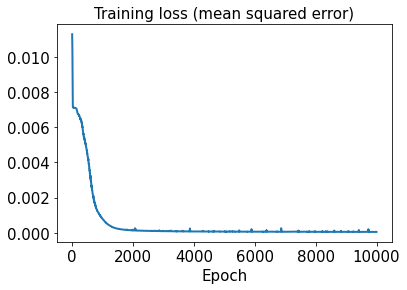

In [31]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

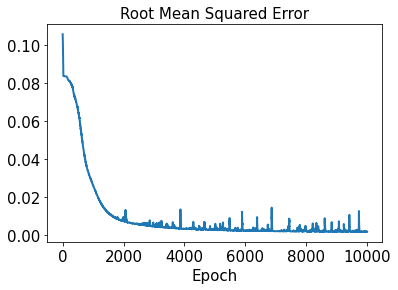

In [32]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
test_results = sd.evaluate(tsr_theta_train)

4/4 [==============================] - 0s 2ms/step - loss: 4.1912e-05 - rmse: 0.0000e+00


In [34]:
decoded_train = sd.predict(tsr_theta_train)

In [35]:
decoded_test = sd.predict(tsr_theta_test)

In [36]:
error_train_abs = np.abs(decoded_train - y_train)

In [37]:
error_test_abs = np.abs(decoded_test - y_test)

In [38]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.0002508717


In [39]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.0023636126


In [40]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.00019605349, 0.00015653274, 0.00013316786, 0.00020784246, 0.00034060125, 0.00018003449, 0.0003784022, 0.00019738109, 0.00032303322, 0.0003714046, 0.00025742708, 0.00018136851, 0.00023806511, 0.0003311401, 0.00013504278, 0.00027812732, 0.00045431976, 0.00012889758, 0.00030287736, 0.00019842046, 0.0002307846, 0.00016026312, 0.00025053884, 0.0004397736, 0.00031363036, 0.00022481111, 0.00031227956, 0.00016817906, 0.00034449177, 0.00013921993, 0.00019244551, 0.00012978166, 0.000103558064, 0.0002984257, 0.00017297873, 0.00025298801, 0.0008871612, 0.00025783113, 0.00013125504, 0.000388392, 0.00013673061, 0.00020728783, 0.00019327269, 0.00043350703, 0.00027570323, 0.0002541234, 0.00014117475, 0.00013979449, 0.0001467763, 0.00025086678, 0.00025237227, 0.00032758288, 0.0003305615, 0.00034807352, 0.00034602403, 0.00010145851, 0.00043042868, 0.00018981005, 0.00046299846, 0.00017299801, 0.00027046737, 0.00016961237, 0.0004462986, 0.0001758176, 0.00017908818, 0.00026846913, 0.0004829092, 0.000358

In [41]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.00048732708, 0.0013383575, 0.00042576814, 0.00033371025, 0.0002950349, 0.017627295, 0.0010075357, 0.0015206926, 0.0013424717, 0.0004974206, 0.00047536145, 0.0026620892, 0.00054503337, 0.0027053144, 0.0013212588, 0.00081710593, 0.0005864575, 0.0010445402, 0.0010556018, 0.0018649166, 0.0061641484, 0.0013085202, 0.0010663581, 0.0010043486, 0.001977203, 0.0005357957, 0.00053069816, 0.0012660306, 0.0006481884, 0.014151097, 0.00076835224, 0.0025708734, 0.0009025379, 0.0066424515, 0.0007333376, 0.0006012182, 0.0003758035, 0.0011019538, 0.0005282509, 0.01676494, 0.0018766063, 0.0014750828, 0.0014501796, 0.0016367122, 0.0064084525]


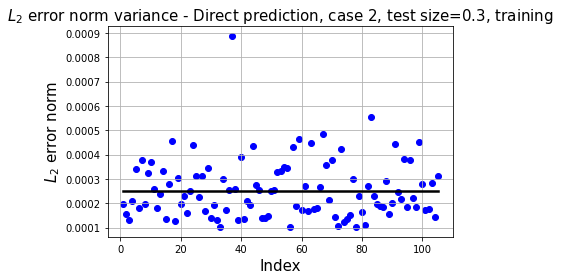

In [42]:
plt.plot(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]),
         l2_error_train*np.ones(x_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 2, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

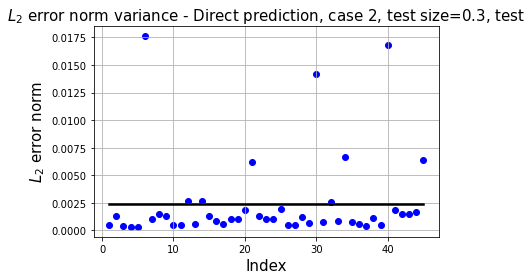

In [43]:
plt.plot(np.linspace(1, tsr_theta_test.shape[0], tsr_theta_test.shape[0]),
         l2_error_test*np.ones(tsr_theta_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], tsr_theta_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 2, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

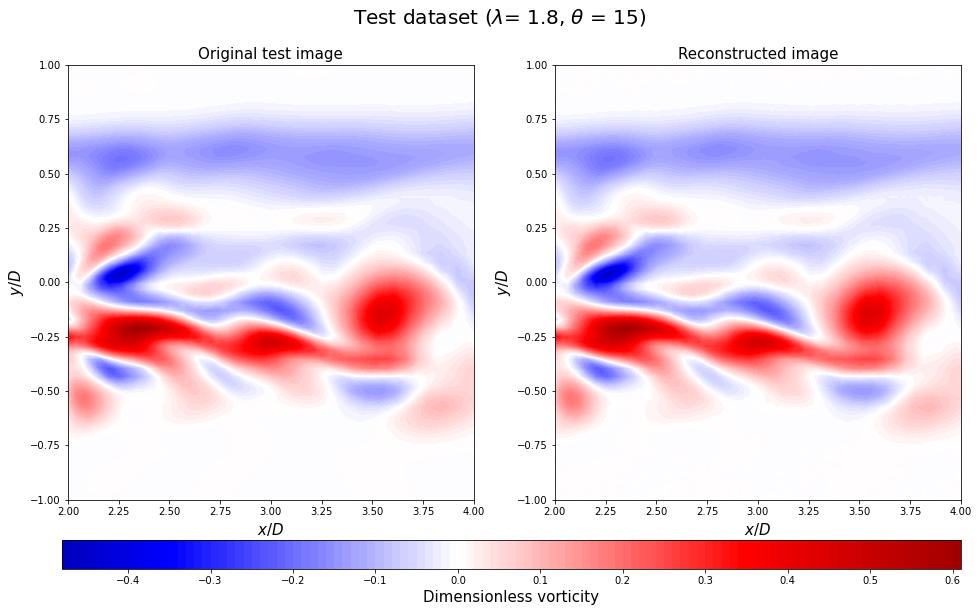

In [44]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

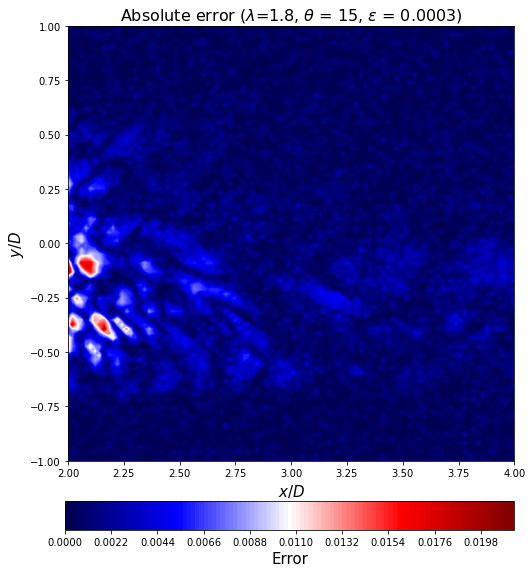

In [45]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()